In [154]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [155]:
df=pd.read_csv('aggregate_covid_country.csv',parse_dates=['Date'])
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [156]:
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [157]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

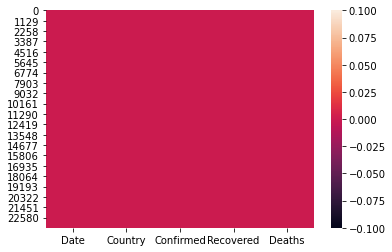

In [158]:
sns.heatmap(df.isnull())

In [159]:
df_dates=pd.DataFrame()
df_dates['month']=df['Date'].dt.month_name()
df_dates['year']=df['Date'].dt.year
df_dates['day']=df['Date'].dt.day_name()
df_dates['deaths']=df['Deaths']
df_dates

,month,year,day,deaths
0,January,2020,Wednesday,0
1,January,2020,Wednesday,0
2,January,2020,Wednesday,0
3,January,2020,Wednesday,0
4,January,2020,Wednesday,0
...,...,...,...,...
23683,May,2020,Tuesday,3
23684,May,2020,Tuesday,1
23685,May,2020,Tuesday,49
23686,May,2020,Tuesday,7


In [160]:
df_dates['year'].drop_duplicates()

0    2020
Name: year, dtype: int64

In [161]:
df_dates['type_of_day']=np.where((df_dates['day']=='Sunday')|(df_dates['day']=='Saturday'),'weekend','weekday')

In [162]:
df_dates

,month,year,day,deaths,type_of_day
0,January,2020,Wednesday,0,weekday
1,January,2020,Wednesday,0,weekday
2,January,2020,Wednesday,0,weekday
3,January,2020,Wednesday,0,weekday
4,January,2020,Wednesday,0,weekday
...,...,...,...,...,...
23683,May,2020,Tuesday,3,weekday
23684,May,2020,Tuesday,1,weekday
23685,May,2020,Tuesday,49,weekday
23686,May,2020,Tuesday,7,weekday


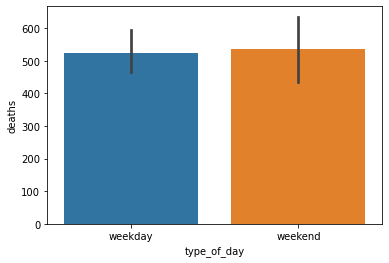

In [163]:
sns.barplot(x='type_of_day',y='deaths',data=df_dates)
plt.show()

From above plot we observe that weekend doesn't contribute much in increasing deaths

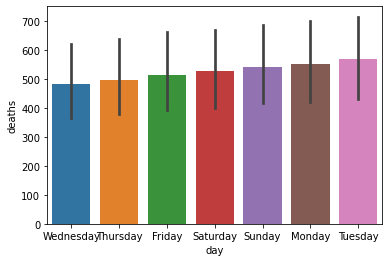

In [164]:
sns.barplot(x='day',y='deaths',data=df_dates)
plt.show()

From above plot we observe that wednesday and Tuesday has lowest and highest no of deaths respectively.

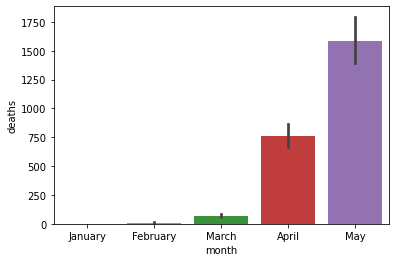

In [165]:
sns.barplot(x='month',y='deaths',data=df_dates)
plt.show()

From above plot we observe that in February and march there were very less fatalities but nos. increased by manyfolds in april and then in may

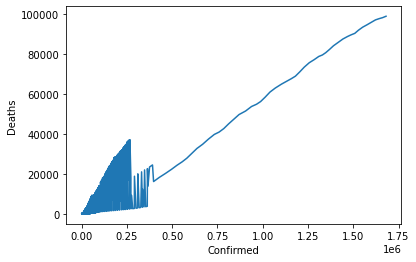

In [166]:
sns.lineplot(x='Confirmed',y='Deaths',data=df)
plt.show()

From above plot we observe that initially the ratio between confirmed cases and deaths was in increasing zigzag manner as it was fluctuating between approximate zero and thousands then it took a linear shape.

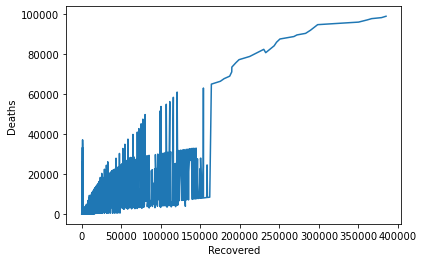

In [167]:
sns.lineplot(x='Recovered',y='Deaths',data=df)
plt.show()

In [168]:
df.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [169]:
df.drop('Country',axis=1,inplace=True)

In [170]:
df

,Date,Confirmed,Recovered,Deaths
0,2020-01-22,0,0,0
1,2020-01-22,0,0,0
2,2020-01-22,0,0,0
3,2020-01-22,0,0,0
4,2020-01-22,0,0,0
...,...,...,...,...
23683,2020-05-26,429,365,3
23684,2020-05-26,9,6,1
23685,2020-05-26,249,10,49
23686,2020-05-26,920,336,7


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23688 non-null  datetime64[ns]
 1   Confirmed  23688 non-null  int64         
 2   Recovered  23688 non-null  int64         
 3   Deaths     23688 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 740.4 KB


No null value present in all of the attributes

In [172]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [192]:
df.corr()

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.924627,0.896751
Recovered,0.924627,1.000000,0.886842
Deaths,0.896751,0.886842,1.000000


From above summary table we observe that there is extremely high standard deviation,mean-median difference and Q3-max difference present in Recovered and Death columns but here I am not going to remove these outliers because this is a factual data and not a hypothetical one, so If I remove the outliers it will compromise with its authenticity.

In [173]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df.iloc[:,1:4]=pt.fit_transform(df.iloc[:,1:4])

In [174]:
df.skew()

Confirmed    0.178414
Recovered    0.412470
Deaths       0.617985
dtype: float64

In [185]:
x=df.drop(columns=["Deaths","Date"])
y=pd.DataFrame(df["Deaths"])

In [186]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr.score(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state        
print('max r2 score corresponding to ',final_r_state,'is',max_r_score)  

max r2 score corresponding to  93 is 0.8379952618725173


In [187]:
print(lr.score(x_train,y_train))

0.8277972102287985


In [188]:
from sklearn.model_selection import cross_val_score
lrscores=cross_val_score(lr,x,y,cv=5,scoring='r2')
lrscores

array([-1.0032681 ,  0.23994209,  0.65635597,  0.70179254,  0.64268649])

In [189]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=93,test_size=0.20)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('MSE is :',mean_squared_error(y_test,y_pred))
print('RMSE is :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_SCORE is :',r2_score(y_test,y_pred))

MSE is : 0.16339712694903832
RMSE is : 0.4042241048589734
R2_SCORE is : 0.8379952618725173


In [180]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor(base_estimator=lr,n_estimators=100)
ad.fit(x_train,y_train)
print(ad.score(x_train,y_train))
ad_pred=ad.predict(x_test)
print(mean_squared_error(y_test,ad_pred))
print(np.sqrt(mean_squared_error(y_test,ad_pred)))
print(r2_score(y_test,ad_pred))

0.810898366565667
0.1801065232101347
0.4243895889511602
0.821428254752548


In [181]:
import joblib
file='agrcovidlr.obj'
joblib.dump(lr,file)
filesaved=joblib.load(file)

Conclusion - After all above EDA,Data Modeling,Hyperparameter Tuning and CV I found that LinearRegression model is not overfitting and its is underfitting a bit and it might be improved by adding more data, since model is already underfitting a bit here I did not used Lasso/Ridge and Random Forest ensemble method.Also error is not much high in LR model so here I have saved LinearRegression model for future prediction.